# Part II - PISA Educational Data Exploration
## by Naji Halpern

## Investigation Overview


> The motivation of this exploration was to examine the correlation between the level of optimism of self perception in students in relation to math performance as well ass the correlation of instuctional best practices in relation to math performance. So variables in the self perception group were examined as well as variables of the school structure group. There were two key insights that came out of the exploration:<br>1. The highest scores were all consistently asociated with opptomistic self perception, but these optimistic perceptions also had the largest spread.<br>2. Averaging all of the self perception variables together yielded a stronger positive correlation between optimism and math scores versus the correlation between instructional best practices and math scores.

## Dataset Overview

> > The PISA data set is an internation collection of education system data. This particular set was collected in 2012. It contains exam scores in the subjects of Math, Literacy, and Science and is expressed in Plausible Values. The data also includes questions that students answered about their home life, school structure, and personal perceptions. Link to PISA data: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1581581520574000


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv', encoding='iso-8859-1')
#create new data frame with only data from the US
df_us = df[df['CNT'] == 'United States of America']


## Student self perception relative to math exam scores


> As depicted in the visual below, we can see the trend of optimism in regards to student self perception in relation to math exam performance. What we are looking for here is the slope and overal trend between optimism and higher test scores. There are four variables depicted by one line each. The first is the degree to which the student enjoys math. This variable has a smooth and consistent correlation with a relatively small change from minimum to maximum value compared to the others. It does indicate that a student who reports being good at math is correlated with higher math scores. The next variable explores whether math is a strong skill a realistic career outlook for the student. This has a positive correlation overall but students who disagreed scored higher on average than those who agree. Next is whether the student beleives they are good at math. This variable has the strongest correlation and seems to confirm the old adage "whether you think you can or think you can't, you are right". Finally the last variable is how students reported whether hard work will result in success. The optimism of this perception also had a very strong correlation.

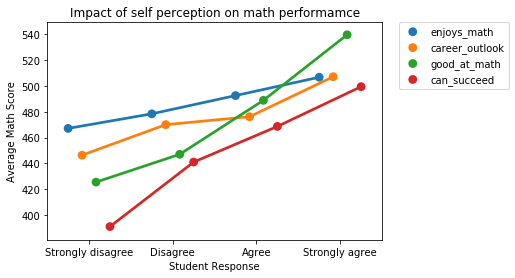

In [6]:
def new_df(df_dict):
    result = {}
    for key, value in df_dict.items():
        result[key] = df_us.groupby(value)['PV1MATH'].mean()
    return result
#create data frame based on student perception questions
df_dict = {'enjoys_math': 'ST29Q04', 'career_outlook': 'ST29Q05', 'bad_at_math': 'ST42Q02', 'can_succeed': 'ST43Q01'}
new_index=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
perceptions = pd.DataFrame(new_df(df_dict)).reindex(new_index)
#reverse column
perceptions_altered = perceptions.copy()
perceptions_altered['bad_at_math'] = perceptions_altered['bad_at_math'].sort_values(ascending= True).values
perceptions_altered = perceptions_altered.rename(columns={'bad_at_math': 'good_at_math'})
#create table
melted = pd.melt(perceptions_altered.reset_index(), id_vars=['index'], value_vars = ['enjoys_math', 'career_outlook', 'good_at_math', 'can_succeed'])
g = sb.pointplot(x='index', y='value', hue='variable', data=melted, dodge = .5)
plt.title('Impact of self perception on math performamce')
plt.xlabel('Student Response')
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## ## School structure relative to math exam scores

> Here we are examining a similar set of relationships, only now we want to see how correlated are the accepted best practices in school instruction relative to performance on a math exam. In the visual below you will see four variables each represented by one line with each point represnting the average score associated with the given response. The variables were questions the students answered including <br> 1. Does the teacher have students reflect on problems?<br>2. Does the teacher check for understanding? <br> 3. Is the teacher the one who plans all activities (instead of students planning activities)?<br> 4. Do students have the opportunity to apply what they have learned? With these variables, we see that three of them have a correlation that is almost identical. When examining those three it is of particular note, that once the data is beyond the "sometimes" response, the data overlapes so perfectly it is almost indistinguishable. However, there is a clear outlier. While each have a positive correlation, the variable where teachers are in charge of planning activies has an almost exponential correlation with test scores. Meaning the more the teacher is in charge, the higher we'd expect scores to be. This can be viewed as a hotly debated topic. Student autonomy in the classroom is a philisophical paradigm where traditional approaches avoid it and more recent progressive approaches embrace it. According to this table, this particular data suggests the traditional view is more correlated with higher scores.

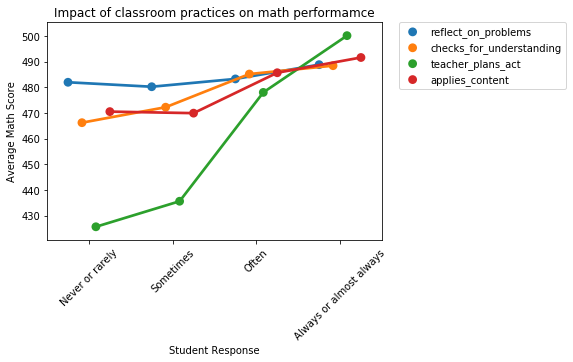

In [7]:
#rename similar response options to be identical
name_dict = {'Never or Hardly Ever' : 'Never or rarely', 'Some Lessons':  'Sometimes', 'Most Lessons': 'Often', 'Every Lesson': 'Always or almost always'}
df_us['ST79Q10'] = df_us['ST79Q10'].apply(lambda x: name_dict[x] if x in name_dict else x)
df_us['ST79Q06'] = df_us['ST79Q06'].apply(lambda x: name_dict[x] if x in name_dict else x)
#create new dataframe for class structure responses
df_dict = {'reflect_on_problems': 'ST80Q01', 'checks_for_understanding' : 'ST79Q06', 'students_plan_act': 'ST79Q10', 'applies_content': 'ST80Q10'}
new_index= ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
structure = pd.DataFrame(new_df(df_dict)).reindex(new_index)
structure = structure.dropna()
#reverse the 'students plan activities' column to reflect 'teacher plans activities'
structure_altered = structure.copy()
structure_altered['students_plan_act'] = structure_altered['students_plan_act'].sort_values(ascending= True).values
structure_altered = structure_altered.rename(columns={'students_plan_act': 'teacher_plans_act'})
#create table
melted = pd.melt(structure_altered.reset_index(), id_vars=['index'], value_vars = ['reflect_on_problems', 'checks_for_understanding', 'teacher_plans_act', 'applies_content'])
g = sb.pointplot(x='index', y='value', hue='variable', data=melted, dodge = .5)
plt.gca().set_title('Impact of classroom practices on math performamce')
plt.xlabel('Student Response')
plt.xticks(rotation= 45)
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## Comparing the two variable groups; student perception vs school structure

>It becomes immeidetaly apparent by the slope of these two graphs, that there is a strong correlation between optimisim in self perception and math scores. The perception minimum is lower than the school structure minimum and the perception maximum is higher than the school structure maximum. There is a very strong correlation and consitent correlation in this group from point to point. In the school structure group there is a softer overall correlation but there is also a subtle change in slope over the course of the data points. It seems to suggest that whether a best practice is not used or only used sometimes does not have a significant correlation in higher test scores, but once a teacher is implementing best practices often or allways, that is where the strong correlation takes hold.



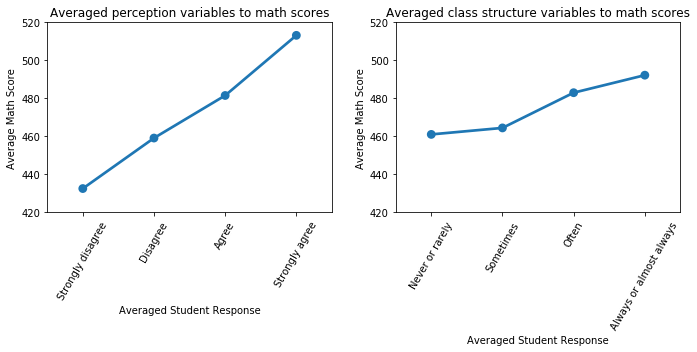

In [8]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

perceptions_altered['Average'] = perceptions_altered.mean(axis=1)
melted = pd.melt(perceptions_altered.reset_index(), id_vars=['index'], value_vars = ['Average'])
sb.pointplot(x='index', y='value', data=melted, ax=ax1)
ax1.set_title('Averaged perception variables to math scores')
ax1.set_xlabel('Averaged Student Response')
ax1.set_ylabel('Average Math Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
ax1.set_ylim(420, 520)

structure_altered['Average'] = structure_altered.mean(axis=1)
melted = pd.melt(structure_altered.reset_index(), id_vars=['index'], value_vars = ['Average'])
sb.pointplot(x='index', y='value', data=melted, ax=ax2)
ax2.set_title('Averaged class structure variables to math scores')
ax2.set_xlabel('Averaged Student Response')
ax2.set_ylabel('Average Math Score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
ax2.set_ylim(420, 520)


plt.tight_layout()
plt.show()

In [ ]:
!conda update -y -c anaconda nbconvert

Solving environment: \ 

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
